# Six degrees of separation

We can revisit Milgram's experience on small worlds. Cf [Kleinberg's Grid Unchained](https://inria.hal.science/hal-02052607/document) for details.

In [4]:
from kleinberg_grid_simulator import compute_edt, parallelize
from collections import defaultdict
from matplotlib import pyplot as plt

In [2]:
rr = [r/10 for r in range(0, 31)]
values = [{'n': 8500, 'r': r, **pq} for r in rr for pq in [{'p': 1, 'q': 600}, {'p': 10, 'q': 380}, {'p': 15, 'q': 120}]]

In [3]:
res = parallelize(values)

100%|███████████████████████████████████████████████████████████████████████████████████| 93/93 [00:21<00:00,  4.31it/s]


In [5]:
edts = defaultdict(list)
for re in res:
    label = f"p={re.p}, q={re.q}"
    edts[label].append(re.edt)

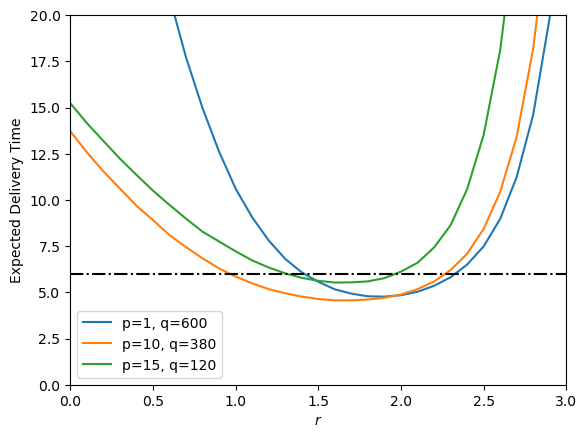

In [11]:
for label, y in edts.items():
    plt.plot(rr, y, label=label)
plt.plot([0, 3], [6, 6], '-.', color='black')
plt.xlabel('$r$')
plt.ylabel('Expected Delivery Time')
plt.xlim([0, 3])
plt.ylim([0, 20])
plt.legend()
plt.show()